True parameters: w0 = 2.5, w1 = 1.0
Estimated parameters (Least Squares): w0 = 2.33, w1 = 1.01
Log-Likelihood of the model: -131.66


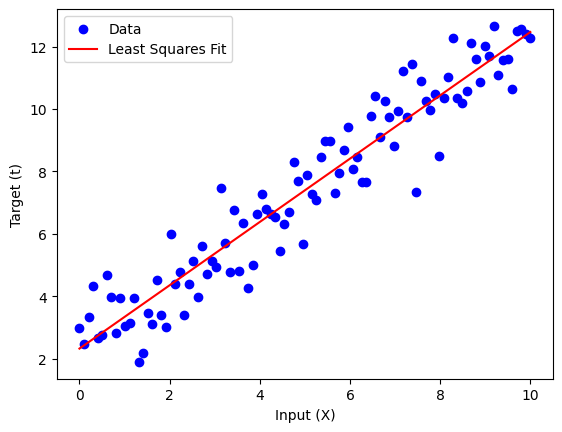

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility

# True parameters
true_w = np.array([2.5, 1.0])  # w0 (bias) = 2.5, w1 = 1.0

# Generate input data (N = 100 samples)
N = 100
X = np.linspace(0, 10, N)  # Inputs from 0 to 10
X = X.reshape(-1, 1)  # Reshape to column vector (N, 1)

# Add a column of ones for the bias term (intercept)
X_with_bias = np.hstack([np.ones((N, 1)), X])

# Generate target data with Gaussian noise (t = y(x, w) + noise)
noise_std = 1.0  # Standard deviation of the Gaussian noise
noise = np.random.normal(0, noise_std, N)
t = X_with_bias.dot(true_w) + noise

# Step 2: Fit the model using Least Squares
# w_hat = (X^T X)^(-1) X^T t
w_hat = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(t)

# Predicted values using the least squares model
t_pred = X_with_bias.dot(w_hat)

# Step 3: Calculate Log-Likelihood (Maximum Likelihood Estimation)
# We assume Gaussian noise with variance sigma^2
# The log-likelihood function for Gaussian noise is:
# L(w, sigma^2) = -N/2 * log(2*pi*sigma^2) - 1/(2*sigma^2) * sum((t_i - y(x_i, w))^2)

# Calculate the sum of squared errors (SSE)
squared_errors = (t - t_pred) ** 2
SSE = np.sum(squared_errors)

# Maximum Likelihood Estimation (MLE)
sigma_squared = np.var(noise)  # Variance of the noise
log_likelihood = -N / 2 * np.log(2 * np.pi * sigma_squared) - SSE / (2 * sigma_squared)

# Output the results
print("True parameters: w0 = {}, w1 = {}".format(true_w[0], true_w[1]))
print("Estimated parameters (Least Squares): w0 = {:.2f}, w1 = {:.2f}".format(w_hat[0], w_hat[1]))
print("Log-Likelihood of the model: {:.2f}".format(log_likelihood))

# Step 4: Plot the results
plt.scatter(X, t, label='Data', color='b')
plt.plot(X, t_pred, label='Least Squares Fit', color='r')
plt.xlabel('Input (X)')
plt.ylabel('Target (t)')
plt.legend()
plt.show()


In [2]:
import numpy as np

# Define the design matrix X and target vector t
X = np.array([[1, 2],
              [2, 3],
              [3, 4]])

t = np.array([5, 7, 9])

# Augment the design matrix X with a column of ones (for intercept term)
ones_column = np.ones((X.shape[0], 1))
Phi = np.hstack((ones_column, X))

# Compute the Moore-Penrose pseudo-inverse of Phi
Phi_pseudo_inv = np.linalg.pinv(Phi)

# Compute the weights using the pseudo-inverse
w = Phi_pseudo_inv.dot(t)

# Print the weights (intercept and feature weights)
print("Weights (w):")
print(w)

# Use the weights to make predictions
y_pred = Phi.dot(w)
print("\nPredicted values (y_pred):")
print(y_pred)


Weights (w):
[1.33333333 0.33333333 1.66666667]

Predicted values (y_pred):
[5. 7. 9.]
